# Part I : Analyse descriptive
## Contexte de l’analyse

###  Le jeu de données. 
Dans ce notebook nous avons utlisé Python 3.8 avec les biblithèques en lignes mensionées dans la cellule suivantes. 

In [1]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np


## sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score, precision_score,recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


# XGBoost
from xgboost import XGBClassifier
from xgboost import plot_importance

## visualisation des données
import seaborn as sns
import matplotlib.pyplot as plt

## visulalisation des valeurs manquantes
import missingno

## Test statistiques
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import statsmodels


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import du dataframe "data.csv"
data_path= "./data.csv"
df =pd.read_csv(data_path, index_col=[0]).set_index("index") 
df.date = pd.to_datetime(df.date)# convertir la variable date au type datetime
df1=df.copy()
df1.date = pd.to_datetime(df1.date)

In [3]:
df.head()

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
index,,,,,,,,,,,
0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


In [4]:
df.dtypes

date          datetime64[ns]
cheveux               object
age                  float64
exp                  float64
salaire              float64
sexe                  object
diplome               object
specialite            object
note                 float64
dispo                 object
embauche               int64
dtype: object

In [5]:
y=df.embauche
y.unique()

array([0, 1], dtype=int64)

## EDA

In [6]:
a=df[df.embauche==1] ##  pour analyser les profils embauchés
b=df[df.embauche==0] ##  pour analyser les profils non embauchés

<AxesSubplot:ylabel='embauche'>

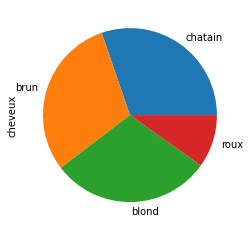

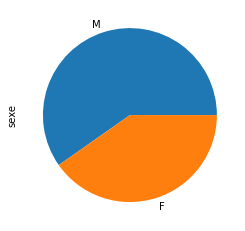

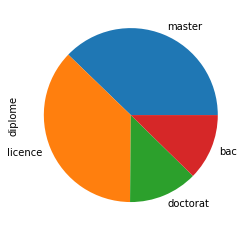

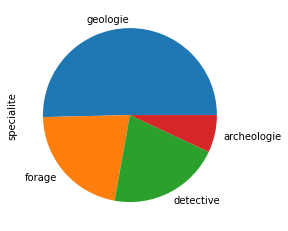

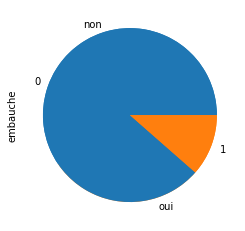

In [7]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()
df['embauche'].value_counts().plot.pie()

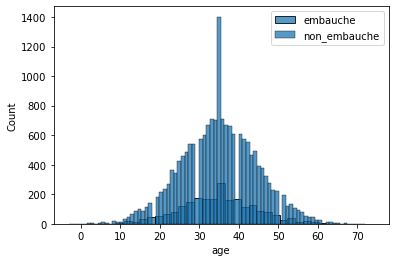

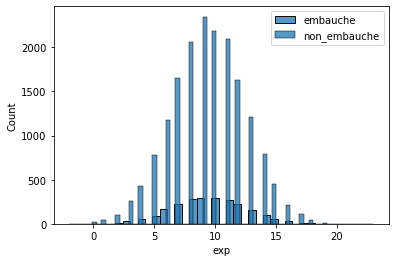

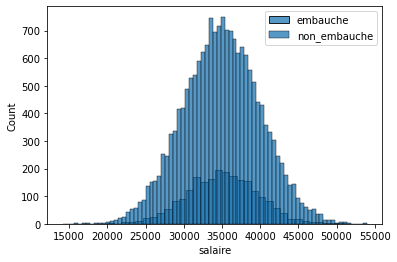

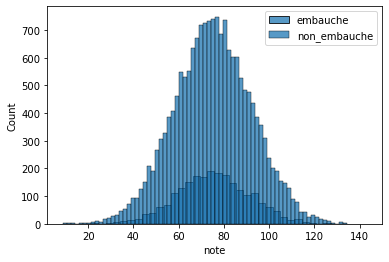

In [8]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.histplot(a[col],  label='embauche')
    sns.histplot(b[col],  label='non_embauche')
    plt.legend()

<Figure size 432x288 with 0 Axes>

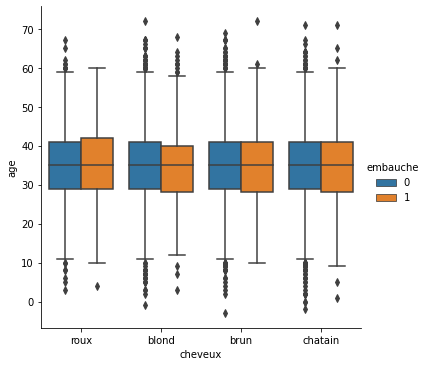

<Figure size 432x288 with 0 Axes>

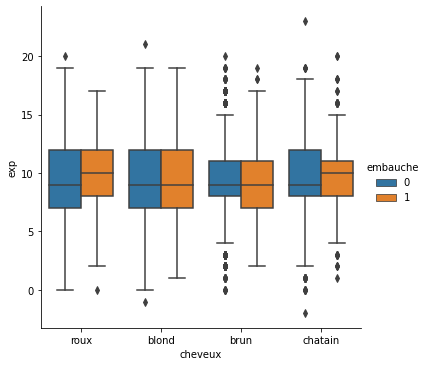

<Figure size 432x288 with 0 Axes>

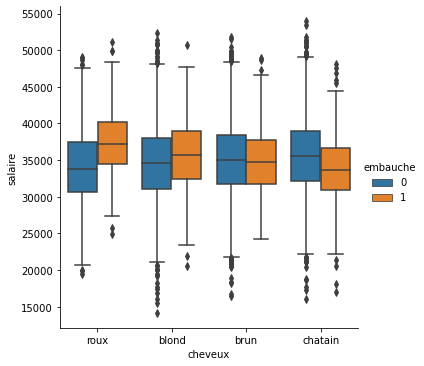

<Figure size 432x288 with 0 Axes>

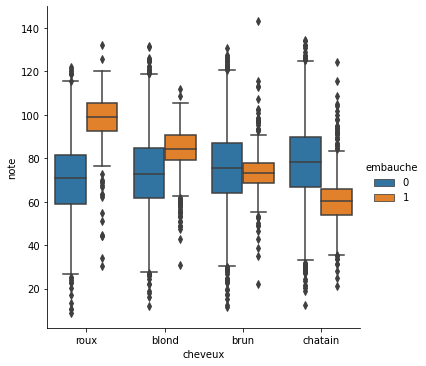

<Figure size 432x288 with 0 Axes>

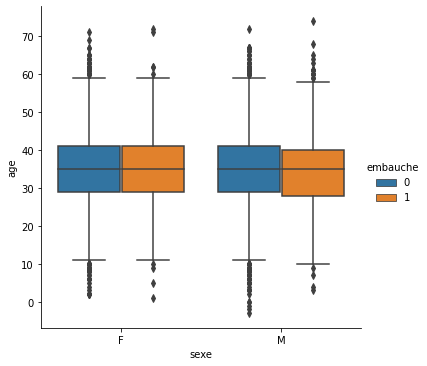

<Figure size 432x288 with 0 Axes>

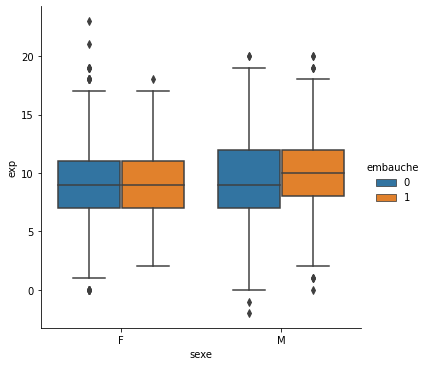

<Figure size 432x288 with 0 Axes>

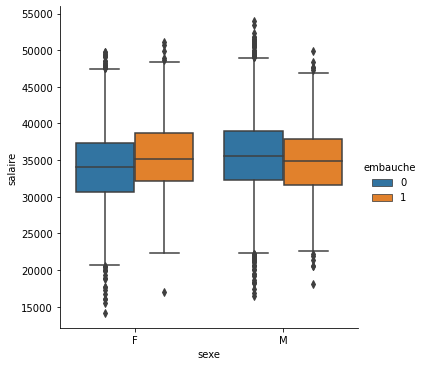

<Figure size 432x288 with 0 Axes>

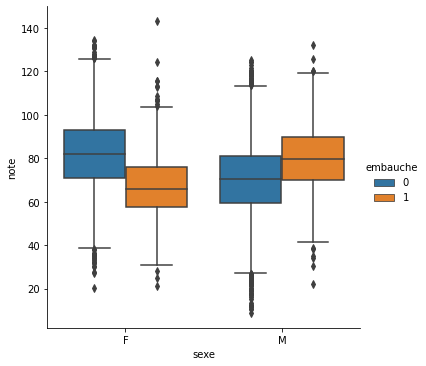

<Figure size 432x288 with 0 Axes>

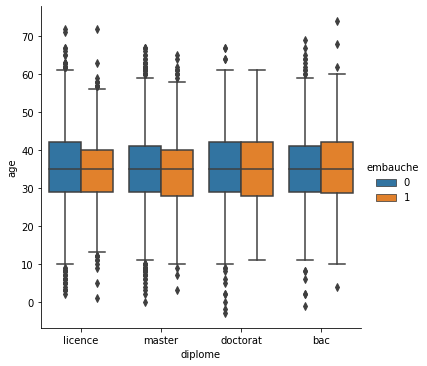

<Figure size 432x288 with 0 Axes>

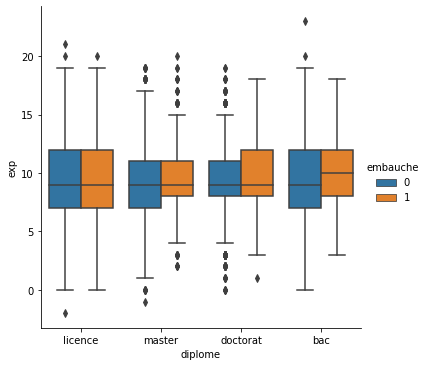

<Figure size 432x288 with 0 Axes>

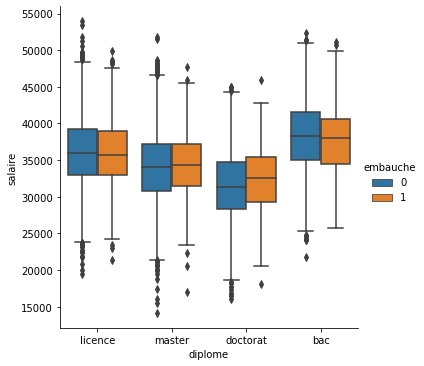

<Figure size 432x288 with 0 Axes>

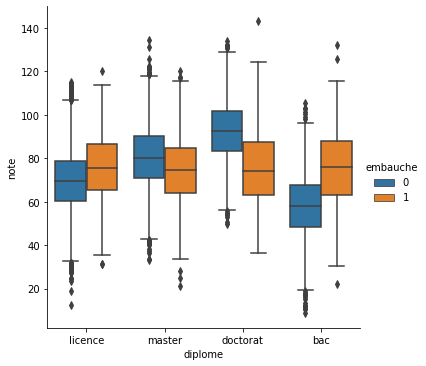

<Figure size 432x288 with 0 Axes>

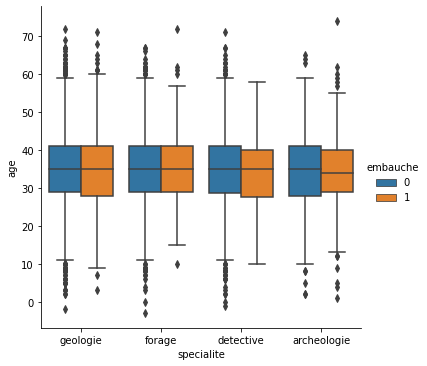

<Figure size 432x288 with 0 Axes>

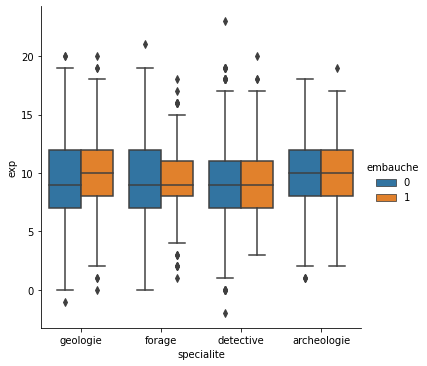

<Figure size 432x288 with 0 Axes>

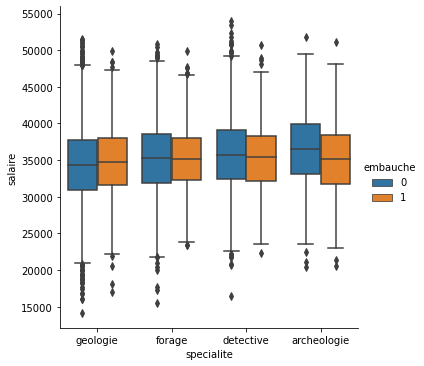

<Figure size 432x288 with 0 Axes>

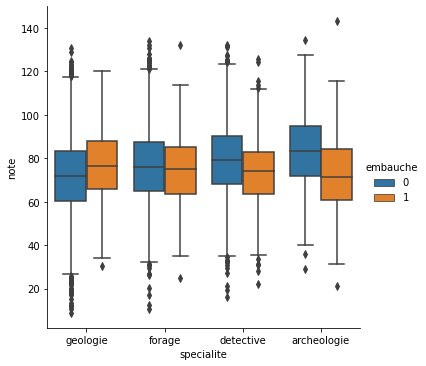

<Figure size 432x288 with 0 Axes>

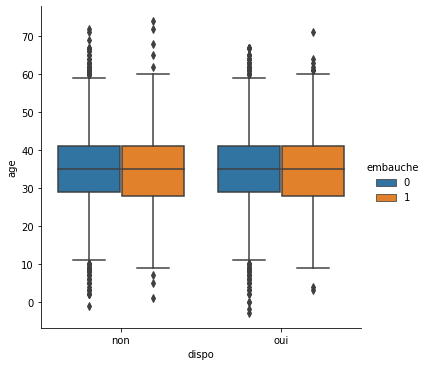

<Figure size 432x288 with 0 Axes>

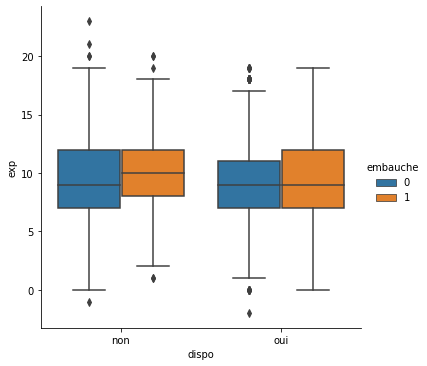

<Figure size 432x288 with 0 Axes>

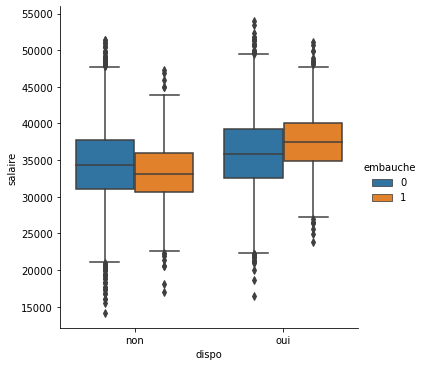

<Figure size 432x288 with 0 Axes>

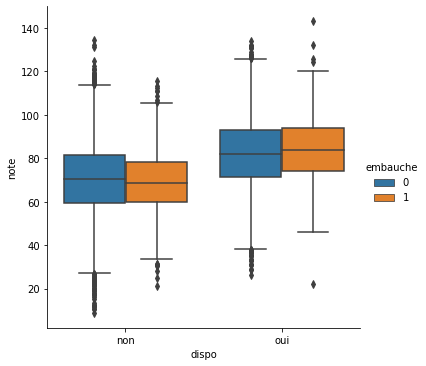

In [9]:
# disribution des variables categorielles par rapport au variables continues
for col in df.select_dtypes('object'):
    for coll in df.select_dtypes('float'):
        plt.figure()
        sns.catplot(x=col, y=coll, hue="embauche", kind="box", data=df)

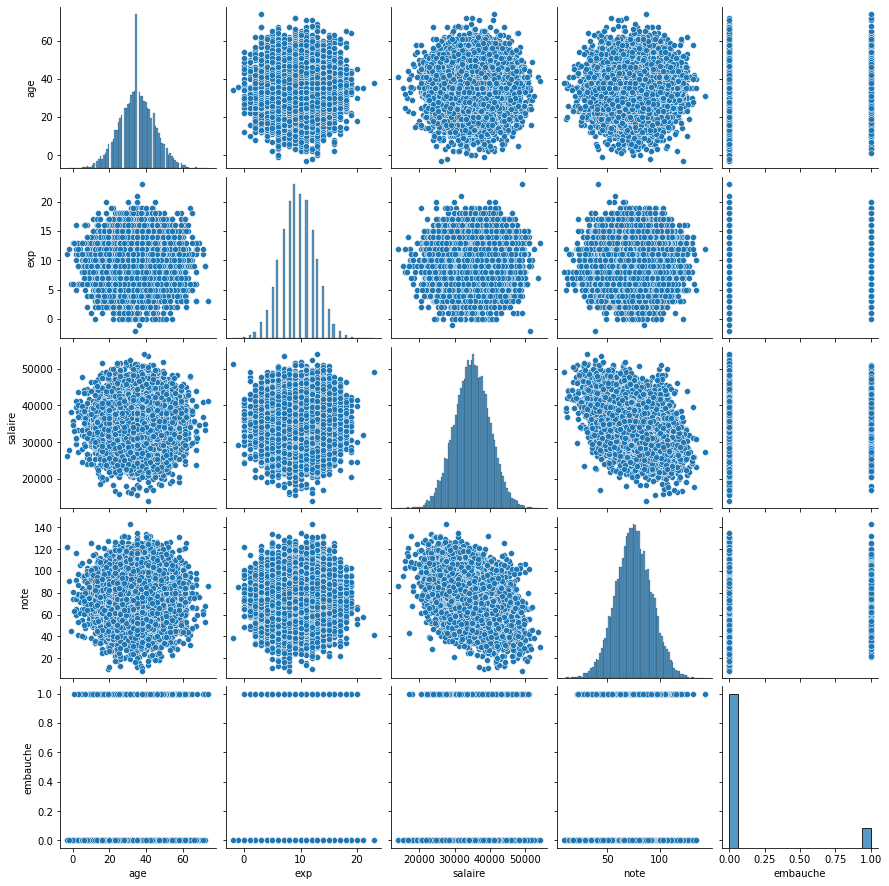

In [10]:
df1=df.copy()
df1.embauche = df1.embauche.astype(object)
sns.pairplot(df1[df1.columns])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        19909 non-null  datetime64[ns]
 1   cheveux     19897 non-null  object        
 2   age         19909 non-null  float64       
 3   exp         19904 non-null  float64       
 4   salaire     19905 non-null  float64       
 5   sexe        19900 non-null  object        
 6   diplome     19890 non-null  object        
 7   specialite  19907 non-null  object        
 8   note        19886 non-null  float64       
 9   dispo       19894 non-null  object        
 10  embauche    20000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 2.5+ MB


* Le salaire et la note ont une corrélation entre eux, pour le reste aucune corrélation claire n'est visible sur les graphes.

In [12]:
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
date,19909,1826,2012-02-03 00:00:00,24,2010-01-01,2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cheveux,19897,4,chatain,6022,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,19909,NaN,NaN,NaN,NaT,NaT,35.0045,9.60917,-3,29,35,41,74
exp,19904,NaN,NaN,NaN,NaT,NaT,9.50035,3.01211,-2,7,9,12,23
salaire,19905,NaN,NaN,NaN,NaT,NaT,34974.3,5003.1,14128,31596,34979,38358,53977
sexe,19900,2,M,11889,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diplome,19890,4,master,7513,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
specialite,19907,4,geologie,10028,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
note,19886,NaN,NaN,NaN,NaT,NaT,75.1688,17.0959,8.68,63.72,75.08,86.6175,143.22
dispo,19894,2,non,11848,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


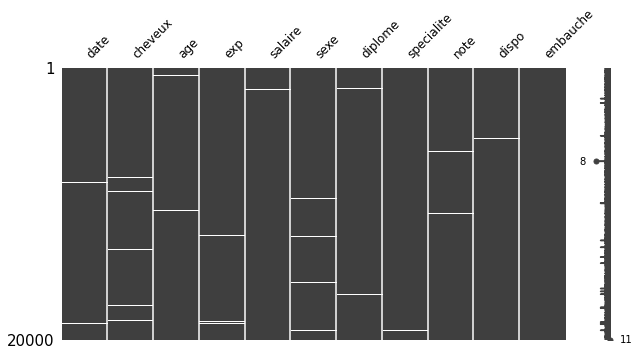

In [13]:
## visualisation des valeurs manquantes
missingno.matrix(df,figsize=(10,5), fontsize=12);

* Ce que nous pouvons dire :
    - Il y a des valeurs manquantes pour toutes les variables.
    - Existence de variables catégorielles que nous traiterons plus tard.
    - Existance de certains valeurs bizzares : des valeur négatives pour les variables age et expérience !
    - L'existance  de valeurs extrèmes (comparer 75% et le max) 
    - La corrélation entre les différentes variables est faible, sauf entre le salaire et le grade.
    - Une régression entre la variable expérience et la variable âge pourrait nous permettre de mieux prédire leurs valeurs manquantes. Mais les graphiques ne montrent aucune possibilité d'effectuer une régression entre ces deux variables.

* Afin de traiter les valeurs manquantes : 
 -  Pour les variables continues, nous remplacerons leurs valeurs manquantes par leur médiane (pour éviter l'impact des valeurs extrêmes).

 -  Pour les variables catégorielles, nous supprimerons les lignes qui contiennent des valeurs manquantes puisque nous ne pouvons pas voter sur une valeur précise et pour éviter de biaiser notre base de données. Cette étape est importante car nous ne pouvons pas appliquer notre modèle avec des variables manquantes.

In [14]:
## changement de valeurs dans le dataphrame df
df.loc[df.age.isnull(), 'age'] = df.age.median()
df.loc[df.exp.isnull(), 'exp'] = df.exp.median()
df.loc[df.salaire.isnull(), 'salaire'] = df.salaire.median()
df.loc[df.note.isnull(), 'note'] = df.note.median()
## suppression des lignes avec des valeurs manquantes
df = df.dropna(axis=0)

* Définition de nouvelles variables liées à la variable date

In [15]:
df1['mois'] = df1.date.dt.month
df1['year'] = df1.date.dt.year

Text(0.5, 1.0, 'nombre des embauchés chaque année par mois')

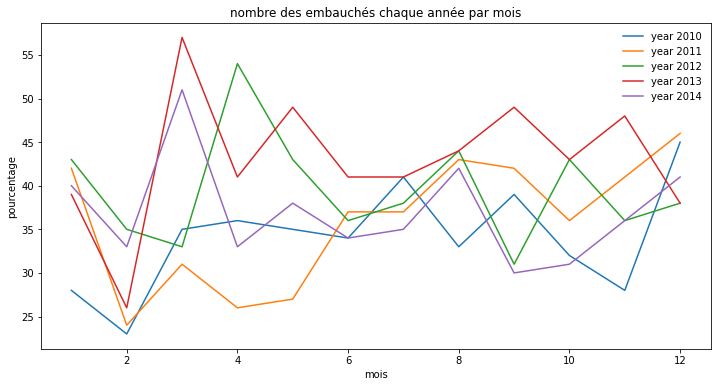

In [16]:
# nombre des embauchés chaque année par mois
a=df1[df1.year==2010]
b=df1[df1.year==2011]
c=df1[df1.year==2012]
d=df1[df1.year==2013]
e=df1[df1.year==2014]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(a.groupby('mois')['embauche'].sum(), label='year 2010')
ax.plot(b.groupby('mois')['embauche'].sum(), label='year 2011')
ax.plot(c.groupby('mois')['embauche'].sum(), label='year 2012')
ax.plot(d.groupby('mois')['embauche'].sum(), label='year 2013')
ax.plot(e.groupby('mois')['embauche'].sum(), label='year 2014')

ax.set_xlabel('mois')
ax.set_ylabel('pourcentage')

ax.legend(loc='upper right', frameon=False)
ax.set_title('nombre des embauchés chaque année par mois')

Text(0.5, 1.0, 'nombre des embauche par mois')

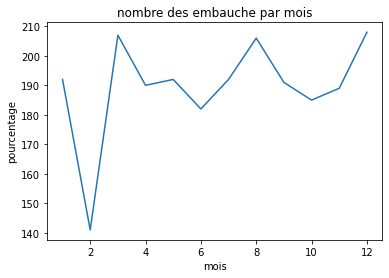

In [17]:
# le nombre des embauchés par mois
plt.plot(df1.groupby('mois')['embauche'].sum())
plt.xlabel('mois')
plt.ylabel('pourcentage')
plt.title('nombre des embauche par mois')

Text(0.5, 1.0, 'pourcentage des embauche chaque année par mois')

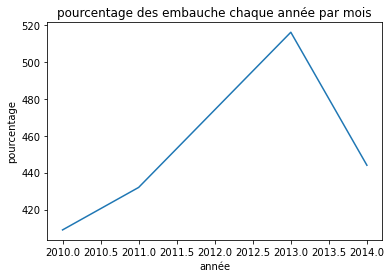

In [18]:
# nombre des embauches par année
plt.plot(df1.groupby('year')['embauche'].sum())
plt.xlabel('année')
plt.ylabel('pourcentage')
plt.title('pourcentage des embauche chaque année par mois')

* Les variables mois et année de candidature ont une influence sur le succès de la candidature donc la variable date a un impact.  
* Pour les mois, nous avons un comportement commun d'une diminution du taux d'admission de janvier à février (tous les graphiques commencent avec une pente négative) et une augmentation de février à mars. Pour le reste des mois, nous ne pouvons pas dire grand chose.
* Pour les années, il est clair qu'il y a des années avec un taux d'admission plus élevé.

Afin de prendre en compte la variable date, nous allons la remplacer par la variable mois qui nous donne le numéro du mois de la candidature. Nous n'allons pas utiliser la variable année car nous considérons que l'année de la candidature ne doit pas influencer notre modèle qui doit être capable de prédire les profils des éventuelles candidatures futures.

In [19]:
# ajout du variable mois 
df['mois'] = df.date.dt.month

In [20]:
# le pourcentage des embauchés parmi les dispos et les non-dispos
df.groupby('sexe')['embauche'].mean()

sexe
F    0.102584
M    0.122261
Name: embauche, dtype: float64

In [21]:
# le pourcentage des embauchés par specialité
df.groupby('specialite')['embauche'].mean()

specialite
archeologie    0.205601
detective      0.100445
forage         0.091704
geologie       0.117202
Name: embauche, dtype: float64

* La spécialité archéologie est au moins deux fois plus souhaitable que les autres spécialités.
* Nous avons le même pourcentage d'admission pour la variable de disponibilité.

In [22]:
# le pourcentage des embauchés par specialité
df.groupby('diplome')['embauche'].mean()

diplome
bac         0.083928
doctorat    0.087846
licence     0.121460
master      0.126228
Name: embauche, dtype: float64

* Les diplômes de master et de doctorat sont les plus recherchés

In [23]:
# le pourcentage des embauchés par couleur de cheveux
df.groupby('cheveux')['embauche'].mean()

cheveux
blond      0.117178
brun       0.115825
chatain    0.109713
roux       0.115405
Name: embauche, dtype: float64

* Nous avons le même pourcentage d'admission pour chaque couleur de cheveux. De plus, pour l'admission d'un candidat, la couleur des cheveux n'est généralement pas prise en compte, surtout pour les postes en thèse. Nous ferons donc l'hypothèse que cette variable n'est pas nécessaire pour la prédiction.

## Une dépendance statistiquement significative entre :

#### (a) La spécialité et le sexe 

In [24]:
# Table de contingence : tableau de croisement entre les modalités des deux variables
table = pd.crosstab(df.specialite, df.sexe)
table

sexe,F,M
specialite,,
archeologie,1066,291
detective,2457,1585
forage,1931,2300
geologie,2364,7414


* l’hypothèse nulle est « les deux variables testées sont indépendantes ». Nous allons étudier cette hypothèse à l'aide du test de chi 2

In [25]:
resultat_test = chi2_contingency(table)
print('Statistique de test: ',resultat_test[0])
print('p-value: ',            resultat_test[1])
print('Degré de libeté: ',    resultat_test[2])

Statistique de test:  2637.596911217624
p-value:  0.0
Degré de libeté:  3


* l'hypothèse nulle  est rejetée (p<5%) et il y a donc une dépendance statistique entre spécialité et sexe

Mesurons le niveau de dépendance entre les deux variables en utilisant le V de Cramer. Il se calcule à l’aide de la statistique de test, du degré de liberté et des dimensions de la table de contingence. Il renvoie une valeur entre 0 et 1

In [26]:
# table de contingence avec margins
table = pd.crosstab(df.specialite, df.sexe, margins=True)
table

sexe,F,M,All
specialite,,,
archeologie,1066,291,1357
detective,2457,1585,4042
forage,1931,2300,4231
geologie,2364,7414,9778
All,7818,11590,19408


In [27]:
from math import sqrt
# Récupération de la taille d’échantillon 
n = 19809 # voir table de contingence avec margins
# Récupération du nombre de modalité de chaque variable
p = 2
q = 4
# Calcul du dénominateur du V de Cramér
m = min(p-1,q-1)
# Calcul du V de Cramér
V = sqrt(resultat_test[0]/(n * m))
print('la valeur de V de Cramer est : ', V)

la valeur de V de Cramer est :  0.36489922147130044


* Comme V=0.37, la dépendance entre spécialité et sexe est plutôt une dépendance significative et modérée

#### (b) La couleur de cheveux et le salaire demandé 

Corrélation entre une variable continue et une variable catégorielle :

Pour étudier ce type de corrélation on peut faire un recours à l’analyse de la variance (ANOVA) à un facteur qui permet de comparer les moyennes d’échantillon.

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['salaire']] = scaler.fit_transform(df[['salaire']])  ## Normalisation de la variable Salaire

<AxesSubplot:xlabel='cheveux', ylabel='salaire'>

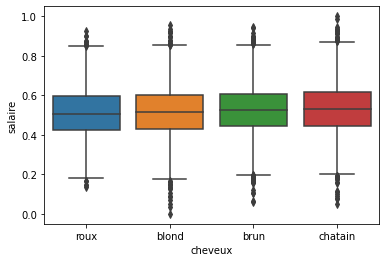

In [29]:
sns.boxplot(x='cheveux', y='salaire', data=df)

* Il n'y a pas de dépendance entre cheveux et Salaire (les distributions des salaires sont quasi-identiques d'un type de cheveux à l'autre)

In [30]:
### 1 ère méthode

from scipy.stats import stats

roux=df.loc[df.cheveux=='roux']['salaire']
blond=df.loc[df.cheveux=='blond']['salaire']
brun=df.loc[df.cheveux=='brun']['salaire']
chatain=df.loc[df.cheveux=='chatain']['salaire']

stats.f_oneway(roux,blond,brun,chatain)

F_onewayResult(statistic=28.795785005322664, pvalue=1.4355479066310955e-18)

In [31]:
## 2 ème méthode
## même résultats

import statsmodels.api
result = statsmodels.formula.api.ols(' salaire ~ cheveux', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
cheveux,3.0,1.348262,0.449421,28.795785,1.435548e-18
Residual,19404.0,302.841590,0.015607,NaN,NaN


#### (c) Le nombre d’années d’expérience et la note à l’exercice 

Corrélation entre deux variables continues : le test de corrélation de Pearson avec la même hypothèse nulle.

In [32]:
pd.DataFrame(pearsonr(df.exp, df.note),
                     index = ['pearson_coeff','p_value'],
                     columns = ['résultat_test'])

,résultat_test
pearson_coeff,-0.010933
p_value,0.127749


* l'hypothèse nulle  est n'est pas rejetée (p>5%). 
* le coefficient a une valeur de -0.01  (valeur très faible et proche de zéro) ce qui signifie que les variables sont très faiblement corrélées.

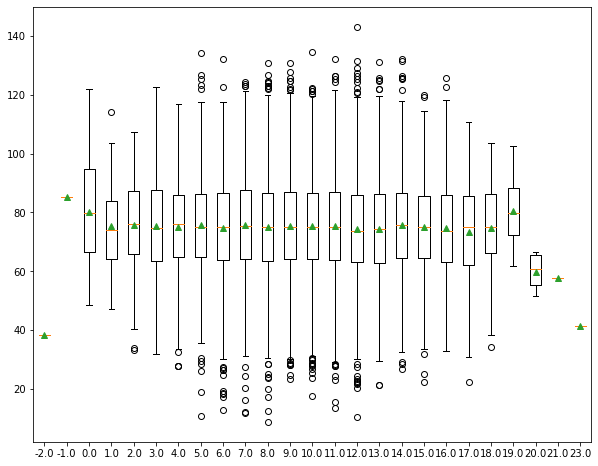

In [33]:
Lexp = sorted(df.exp.unique())
Lnote = []

for el in Lexp:
    notes = df[df.exp==el]['note'].dropna()
    Lnote.append(notes.values)
    
fig, ax = plt.subplots(figsize=(10,8))    
ax.boxplot(Lnote, labels=Lexp, showmeans=True)
plt.show()

* Le graphique illustre ce que nous avons constaté mathématiquement. Une dépendance faible sauf pour les profils très expérimentés (ceci s'explique par le fait qu'ils ne se souviennent pas des concepts théoriques).